In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = 'result/'
res_adult = pd.read_csv(path + 'resultado_adult.csv')
res_adult.drop('Unnamed: 0', axis=1, inplace=True)
res_compas = pd.read_csv(path + 'resultado_compas.csv')
res_compas.drop('Unnamed: 0', axis=1, inplace=True)
res_german = pd.read_csv(path + 'resultado_german.csv')
res_german.drop('Unnamed: 0', axis=1, inplace=True)
res_default = pd.read_csv(path + 'resultado_default.csv')
res_default.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
res_completo = res_adult.append(res_compas).append(res_german).append(res_default)
res_completo

,name_exp,feat_imp,shap_rank,mean_unpriv,mean_priv,priv_greater_unpriv,dataset,acc_test,disp_impact_bin,mean_difference,disp_impact_clf,avg_odds,equal_opport,false_discovery_rate,entropy_index,consistency
0,rf_orig,0.007337,12,-0.010185,0.005928,1,adult,0.860170,0.244023,-0.173710,0.244023,-0.106047,-0.158285,-0.016817,0.078318,0.947221
1,rf_transf,0.004047,18,0.006054,-0.003024,0,adult,0.855052,0.530744,-0.091756,0.530744,0.058766,0.124075,0.173407,0.081918,0.945747
2,gbm_orig,0.093556,7,-0.141580,0.069852,1,adult,0.869280,0.278003,-0.181024,0.278003,-0.083733,-0.109096,-0.012724,0.071511,0.930679
3,gbm_transf,0.005048,23,0.006760,-0.004097,0,adult,0.861603,0.530053,-0.100801,0.530053,0.055673,0.117890,0.187564,0.076729,0.931846
4,lr_orig,0.356385,6,-0.547167,0.262178,1,adult,0.852083,0.291660,-0.186588,0.291660,-0.090538,-0.107537,0.024598,0.079902,0.937926
5,lr_transf,0.047660,29,0.009582,-0.002003,0,adult,0.845327,0.545496,-0.098600,0.545496,0.057887,0.132108,0.175112,0.085683,0.940854
0,rf_orig,0.008153,8,0.000978,-0.001316,0,compas,0.672246,0.762598,-0.169024,0.762598,-0.137713,-0.105280,0.049322,0.143566,0.921166
1,rf_transf,0.021213,4,0.016507,-0.030194,0,compas,0.669006,0.828263,-0.115603,0.828263,-0.082969,-0.059615,0.065686,0.146065,0.911447
2,gbm_orig,0.028895,6,0.022917,-0.038911,0,compas,0.677646,0.741818,-0.189250,0.741818,-0.156368,-0.128418,0.049174,0.138749,0.942657
3,gbm_transf,0.166936,3,0.131817,-0.235287,0,compas,0.671166,0.865256,-0.090484,0.865256,-0.055832,-0.042165,0.078920,0.140175,0.920518


In [4]:
res_completo['data'] = res_completo['name_exp'].apply(lambda row: row.split('_')[-1])
res_completo['model'] = res_completo['name_exp'].apply(lambda row: row.split('_')[0])
res_completo['new_name'] = res_completo.apply(lambda row: row['dataset'] + '_' +
                                              row['name_exp'].split('_')[0], axis=1)
res_completo['mean_dif'] = res_completo.apply(lambda row: row['mean_unpriv'] - 
                                              row['mean_priv'], axis=1)

In [5]:
res_completo.head()

,name_exp,feat_imp,shap_rank,mean_unpriv,mean_priv,priv_greater_unpriv,dataset,acc_test,disp_impact_bin,mean_difference,disp_impact_clf,avg_odds,equal_opport,false_discovery_rate,entropy_index,consistency,data,model,new_name,mean_dif
0,rf_orig,0.007337,12,-0.010185,0.005928,1,adult,0.860170,0.244023,-0.173710,0.244023,-0.106047,-0.158285,-0.016817,0.078318,0.947221,orig,rf,adult_rf,-0.016112
1,rf_transf,0.004047,18,0.006054,-0.003024,0,adult,0.855052,0.530744,-0.091756,0.530744,0.058766,0.124075,0.173407,0.081918,0.945747,transf,rf,adult_rf,0.009078
2,gbm_orig,0.093556,7,-0.141580,0.069852,1,adult,0.869280,0.278003,-0.181024,0.278003,-0.083733,-0.109096,-0.012724,0.071511,0.930679,orig,gbm,adult_gbm,-0.211432
3,gbm_transf,0.005048,23,0.006760,-0.004097,0,adult,0.861603,0.530053,-0.100801,0.530053,0.055673,0.117890,0.187564,0.076729,0.931846,transf,gbm,adult_gbm,0.010857
4,lr_orig,0.356385,6,-0.547167,0.262178,1,adult,0.852083,0.291660,-0.186588,0.291660,-0.090538,-0.107537,0.024598,0.079902,0.937926,orig,lr,adult_lr,-0.809345


In [6]:
res_variation = pd.DataFrame()
columns_sel = ['mean_difference', 'equal_opport', 'consistency', 'feat_imp', 'mean_dif', 'data']

for name in res_completo['new_name'].unique():
    df_var = res_completo.loc[res_completo['new_name'] == name, 
                          columns_sel].pivot_table(columns='data')
    df_var['variation'] = (df_var['transf'] - df_var['orig'])    
    df_var['new_name'] = name
    res_variation = res_variation.append(df_var)

res_variation['dataset'] = res_variation['new_name'].apply(lambda row: row.split('_')[0])
res_variation['model'] = res_variation['new_name'].apply(lambda row: row.split('_')[1])
res_variation.reset_index(inplace=True)

In [7]:
res_variation.loc[res_variation['index'] == 'consistency'].sort_values(by='variation')

data,index,orig,transf,variation,new_name,dataset,model
25,consistency,0.955832,0.905616,-0.050216,compas_lr,compas,lr
20,consistency,0.942657,0.920518,-0.022138,compas_gbm,compas,gbm
15,consistency,0.921166,0.911447,-0.009719,compas_rf,compas,rf
0,consistency,0.947221,0.945747,-0.001474,adult_rf,adult,rf
40,consistency,0.810667,0.809333,-0.001333,german_lr,german,lr
50,consistency,0.969733,0.969711,-0.000022,default_gbm,default,gbm
55,consistency,0.975089,0.975422,0.000333,default_lr,default,lr
5,consistency,0.930679,0.931846,0.001167,adult_gbm,adult,gbm
45,consistency,0.967711,0.969200,0.001489,default_rf,default,rf
10,consistency,0.937926,0.940854,0.002928,adult_lr,adult,lr


In [25]:
help(axes[0].set_figure)

Help on method set_figure in module matplotlib.axes._base:

set_figure(fig) method of matplotlib.axes._subplots.AxesSubplot instance
    Set the class:`~matplotlib.axes.Axes` figure
    
    accepts a class:`~matplotlib.figure.Figure` instance



In [50]:
gridspec.GridSpec(1, 5)

[None, None, None, None, None, None, None, None, None, None, None, None]

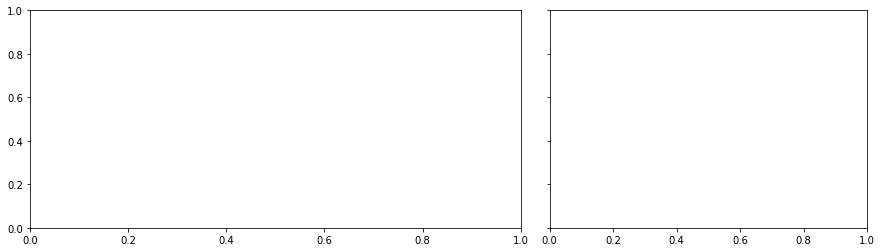

In [64]:
fig = pl.figure(figsize=(15,4))
# fig, axes = pl.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True)

gs = gridspec.GridSpec(1,5)
ax0 = fig.add_subplot(gs[:, 0:3])
ax1 = fig.add_subplot(gs[:, 3:], sharey=ax0)
pl.setp(ax1.get_yticklabels(), visible=False)

# ax0 = pl.subplot2grid((1, 4), (0, 0), colspan=3)
# ax1 = pl.subplot2grid((1, 4), (0, 2))


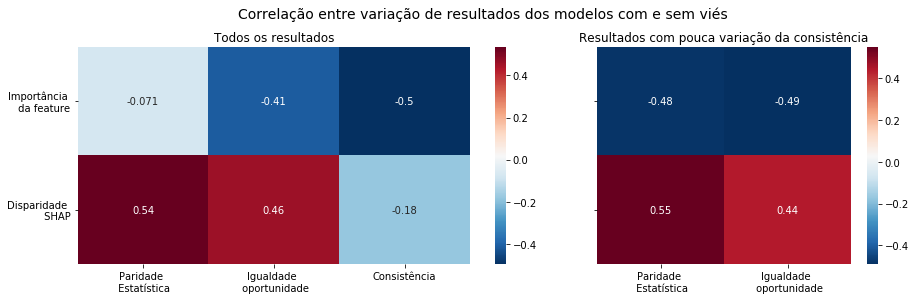

In [74]:
# fig, axes = pl.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True)

df_var_pivot = pd.pivot_table(data=res_variation, index='new_name', columns='index', values='variation')
df_var_corr = df_var_pivot.corr(method='pearson')
df_var_corr = df_var_corr[['mean_difference', 'equal_opport', 'consistency']]
df_var_corr = df_var_corr[df_var_corr.index.isin(['mean_dif', 'feat_imp'])]
df_var_corr.index = ['Importância \n da feature', 'Disparidade \n SHAP']
df_var_corr.columns = ['Paridade \n Estatística', 'Igualdade \n oportunidade', 'Consistência']

fig = pl.figure(figsize=(15,4))
gs = gridspec.GridSpec(1,5)
ax0 = fig.add_subplot(gs[:, 0:3])
ax1 = fig.add_subplot(gs[:, 3:], sharey=ax0)
pl.setp(ax1.get_yticklabels(), visible=False)

sns.heatmap(df_var_corr, cmap="RdBu_r",  annot=True, ax=ax0)
# axes[0].figsize(10,4)
ax0.set_title('Todos os resultados')
ax0.set_yticklabels(['a', 'b'], rotation=0)

res_variation2 = res_variation[~res_variation['new_name'].isin(['compas_lr', 'compas_gbm', 'german_rf'])]
df_var_pivot = pd.pivot_table(data=res_variation2, index='new_name', columns='index', values='variation')
df_var_corr = df_var_pivot.corr(method='pearson')
df_var_corr = df_var_corr[['mean_difference', 'equal_opport']]
df_var_corr = df_var_corr[df_var_corr.index.isin(['mean_dif', 'feat_imp'])]
df_var_corr.index = ['Importância \n da feature', 'Disparidade \n SHAP']
df_var_corr.columns = ['Paridade \n Estatística', 'Igualdade \n oportunidade']

sns.heatmap(df_var_corr, cmap="RdBu_r",  annot=True, ax=ax1)
ax1.set_title('Resultados com pouca variação da consistência')
pl.yticks(rotation=0)
pl.suptitle('Correlação entre variação de resultados dos modelos com e sem viés', fontsize=14, y=1.02)
# pl.show()


pl.savefig(path+'correlacao_variacao_resultados.png', bbox_inches='tight', transparent=True)

In [17]:
dfc = res_variation[res_variation['index']=='consistency']
dfc['variation_abs'] = dfc['variation'].abs()
dfc.sort_values(by='variation_abs', ascending=False)

/home/juliana/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


data,index,orig,transf,variation,new_name,dataset,model,variation_abs
25,consistency,0.955832,0.905616,-0.050216,compas_lr,compas,lr,0.050216
20,consistency,0.942657,0.920518,-0.022138,compas_gbm,compas,gbm,0.022138
30,consistency,0.862000,0.879333,0.017333,german_rf,german,rf,0.017333
15,consistency,0.921166,0.911447,-0.009719,compas_rf,compas,rf,0.009719
35,consistency,0.805333,0.810667,0.005333,german_gbm,german,gbm,0.005333
10,consistency,0.937926,0.940854,0.002928,adult_lr,adult,lr,0.002928
45,consistency,0.967711,0.969200,0.001489,default_rf,default,rf,0.001489
0,consistency,0.947221,0.945747,-0.001474,adult_rf,adult,rf,0.001474
40,consistency,0.810667,0.809333,-0.001333,german_lr,german,lr,0.001333
5,consistency,0.930679,0.931846,0.001167,adult_gbm,adult,gbm,0.001167


In [69]:
def remove_axis_full(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
def remove_axis(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

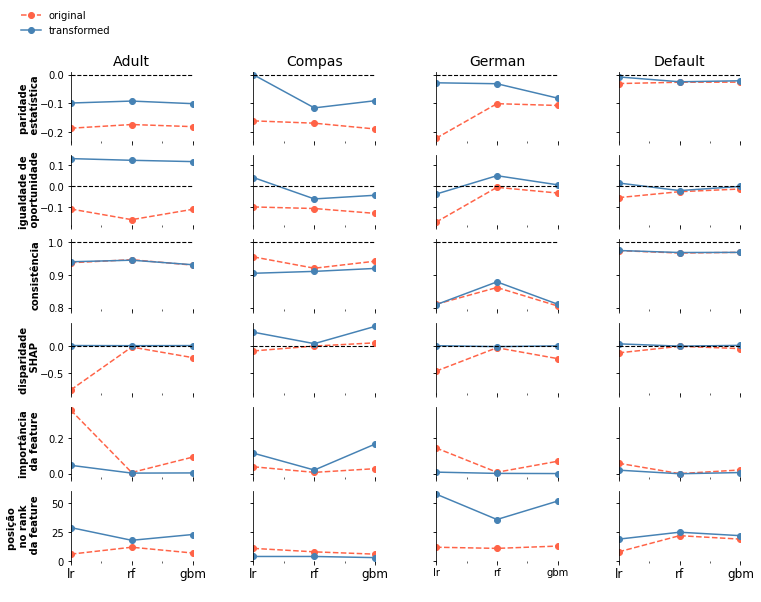

In [70]:
x = list(range(3))
my_xticks = ["lr", "rf", "gbm"]

res_completo['model'] = pd.Categorical(res_completo['model'], my_xticks)
res_completo.sort_values(by='model', inplace=True)

df_orig_adult = res_completo[(res_completo['data'] == 'orig') & 
                             (res_completo['dataset'] == 'adult')]
df_orig_compas = res_completo[(res_completo['data'] == 'orig') & 
                                (res_completo['dataset'] == 'compas')]
df_orig_german = res_completo[(res_completo['data'] == 'orig') & 
                              (res_completo['dataset'] == 'german')]
df_orig_default = res_completo[(res_completo['data'] == 'orig') & 
                               (res_completo['dataset'] == 'default')]

df_transf_adult = res_completo[(res_completo['data'] == 'transf') & 
                               (res_completo['dataset'] == 'adult')]
df_transf_compas = res_completo[(res_completo['data'] == 'transf') & 
                                (res_completo['dataset'] == 'compas')]
df_transf_german = res_completo[(res_completo['data'] == 'transf') & 
                                (res_completo['dataset'] == 'german')]
df_transf_default = res_completo[(res_completo['data'] == 'transf') & 
                                 (res_completo['dataset'] == 'default')]

name2title = {'acc_test': 'accuracy',
              'disp_impact_bin': 'disparate \n impact',              
              'equal_opport': 'igualdade de \n oportunidade',
              'entropy_index': 'gen. entropy index',
              'feat_imp': 'importância \n da feature',
              'mean_dif': 'disparidade \n SHAP',
              'shap_rank': 'posição \n no rank \n da feature',
              'mean_difference': 'mean_difference',
             'false_discovery_rate': 'false_discovery_rate',
             'priv_greater_unpriv': 'privileged > \n unprivileged',
             'acc_test': 'acc_test',
             'consistency': 'consistência',
              'mean_difference': 'paridade \n estatística'}
fig, axes = pl.subplots(nrows=6, ncols=4, figsize=(12, 9), sharex=True, sharey='row')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

columns = ['mean_difference', 'equal_opport', 'consistency', 'mean_dif', 'feat_imp', 'shap_rank']
for i, col in enumerate(columns):
    df_orig_adult.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,0], 
                 legend=False, grid=False)
    df_transf_adult.plot(x='new_name', y=col, color='steelblue', style='-o', ax=axes[i,0],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport', 'mean_difference']:
        axes[i, 0].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'consistency':
        axes[i, 0].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,0].set_ylabel(name2title[col], fontsize=10, fontweight='bold')
    axes[i,0].yaxis.set_label_coords(-0.25, 0.5)
    axes[i,0].set_facecolor('xkcd:white')
    remove_axis(axes[i,0])
        
for i, col in enumerate(columns):
    df_orig_compas.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,1], 
                 legend=False, grid=False)
    df_transf_compas.plot(x='new_name', y=col, color='steelblue', style='-o', ax=axes[i,1],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport', 'mean_difference']:
        axes[i, 1].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'consistency':
        axes[i, 1].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,1].set_facecolor('xkcd:white')
    remove_axis(axes[i,1])
    
for i, col in enumerate(columns):
    df_orig_german.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,2], 
                 legend=False, grid=False)
    df_transf_german.plot(x='new_name', y=col, color='steelblue', style='-o', ax=axes[i,2],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport', 'mean_difference']:
        axes[i, 2].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'consistency':
        axes[i, 2].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,2].set_facecolor('xkcd:white')
    remove_axis(axes[i,2])

for i, col in enumerate(columns):
    df_orig_default.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,3], 
                 legend=False, grid=False)
    df_transf_default.plot(x='new_name', y=col, color='steelblue', style='-o', ax=axes[i,3],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport', 'mean_difference']:
        axes[i, 3].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'consistency':
        axes[i, 3].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,3].set_facecolor('xkcd:white')
    remove_axis(axes[i,3])
    
axes[0,0].set_title('Adult', fontsize=14)
axes[0,1].set_title('Compas', fontsize=14)
axes[0,2].set_title('German', fontsize=14)
axes[0,3].set_title('Default', fontsize=14)
pl.xlabel(' ')
axes[5,0].set_xlabel(' ')
axes[5,1].set_xlabel(' ')
axes[5,2].set_xlabel(' ')
pl.xticks(x, my_xticks, fontsize=12)
legend = pl.legend(['original', 'transformed'], bbox_to_anchor=(-4.1, 8), frameon=False)
legend.get_frame().set_edgecolor('k')
fig.patch.set_facecolor('w')
axes[5,0].tick_params(axis='x', which='major', labelsize=12)
axes[5,1].tick_params(axis='x', which='major', labelsize=12)

pl.savefig(path+'tese_res_final_dataset.png', bbox_inches='tight', transparent=True)

In [71]:
def plot_marker(df_compl, x_name, y_name, fillstyle, ax, label):
    for name in df_compl.new_name.unique():
        df = df_compl[df_compl['new_name'] == name]
        x = df[x_name].values
        y = df[y_name].values
        marker = model2marker[df['model'].iloc[0]]
        color = dataset2color[df['dataset'].iloc[0]]
        if label:
            ax.plot(x, y, fillstyle=fillstyle, linestyle='none', markersize=10,
                    marker=marker, color=color, label=name)
        else:
            ax.plot(x, y, fillstyle=fillstyle, linestyle='none', markersize=10,
                    marker=marker, color=color)

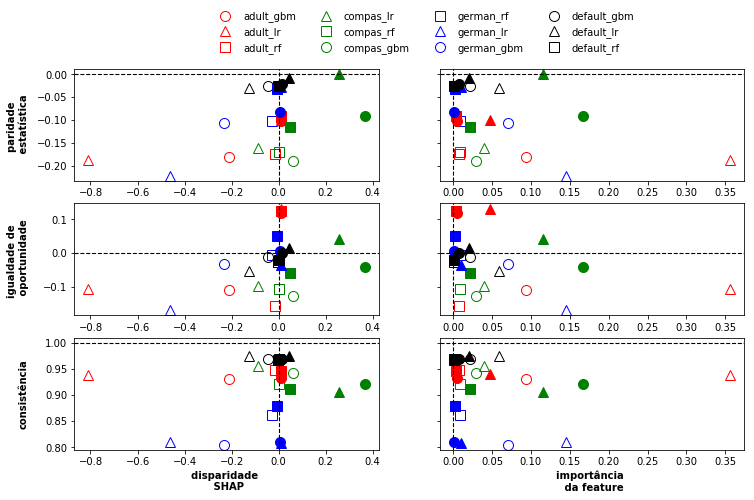

In [73]:
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)
model2marker = {'lr': '^', 'rf': 's', 'gbm': 'o'}
dataset2color = {'adult': 'red', 'compas': 'green', 'german': 'blue', 'default': 'k'}

my_xticks = ['adult', 'compas', 'german', 'default']

res_completo['dataset'] = pd.Categorical(res_completo['dataset'], my_xticks)
res_completo.sort_values(by='dataset', inplace=True)


name2title = {'acc_test': 'accuracy',
              'disp_impact_bin': 'disparate \n impact',              
              'equal_opport': 'igualdade de \n oportunidade',
              'entropy_index': 'gen. entropy index',
              'feat_imp': 'importância \n da feature',
              'mean_dif': 'disparidade \n SHAP',
              'shap_rank': 'posição \n no rank \n da feature',
              'mean_difference': 'mean_difference',
             'false_discovery_rate': 'false_discovery_rate',
             'priv_greater_unpriv': 'privileged > \n unprivileged',
             'acc_test': 'acc_test',
             'consistency': 'consistência',
              'mean_difference': 'paridade \n estatística'}

fig, axes = pl.subplots(nrows=3, ncols=2, figsize=(12, 7), sharey='row')
order_axes = []
for i in range(2):
    for j in range(3):
        order_axes.append(axes[j, i])
        
fairness_meas = ['mean_difference', 'equal_opport', 'consistency']
feat_import_meas = ['mean_dif', 'feat_imp']

for idx, (x_name, y_name) in enumerate(itertools.product(feat_import_meas, fairness_meas)):
    ax = order_axes[idx]

    res_completo_orig = res_completo[res_completo['data'] == 'orig']
    fillstyle = 'none'
    plot_marker(res_completo_orig, x_name, y_name, fillstyle, ax, True)

    res_completo_transf = res_completo[res_completo['data'] == 'transf']
    fillstyle = 'full'
    plot_marker(res_completo_transf, x_name, y_name, fillstyle, ax, False)
    if idx in [2, 5]: 
        ax.set_xlabel(name2title[x_name], fontsize=10, fontweight='bold')
    if idx < 3: 
        ax.set_ylabel(name2title[y_name], fontsize=10, fontweight='bold')
        ax.yaxis.set_label_coords(-0.15, 0.5)    
    if x_name == 'mean_dif':
        ax.axvline(x=0, color='k', linestyle='--', linewidth=1.1)
    elif x_name == 'feat_imp':
        ax.axvline(x=0, color='k', linestyle='--', linewidth=1.1)
        
    if y_name == 'equal_opport':
        ax.axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif y_name == 'mean_difference':
        ax.axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif y_name == 'consistency':
        ax.axhline(y=1, color='k', linestyle='--', linewidth=1.1)        

pl.legend( bbox_to_anchor=(0.67,4), frameon=False, ncol=4)
pl.savefig(path+'tese_res_final_scatter.png', bbox_inches='tight')